In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('imputed_data.csv')

In [3]:
# creating date, month, and year column
data['date'] = pd.to_datetime(data['date'], format = '%m/%d/%y')
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [4]:
regions = {
    'Northwest': ['Washington', 'Oregon', 'Idaho', 'Montana', 'Wyoming'],
    'Southwest': ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
                'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky',
              'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'South Carolina',
              'Tennessee', 'Virginia', 'West Virginia'],
    'Great Lakes': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'],
    'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']
}

# Create separate dataframes for each region and set 'date' as the index
Northwest = data[data['state_name'].isin(regions['Northwest'])].set_index('date')
Southwest = data[data['state_name'].isin(regions['Southwest'])].set_index('date')
Midwest = data[data['state_name'].isin(regions['Midwest'])].set_index('date')
South = data[data['state_name'].isin(regions['South'])].set_index('date')
Great_Lakes = data[data['state_name'].isin(regions['Great Lakes'])].set_index('date')
New_England = data[data['state_name'].isin(regions['New England'])].set_index('date')

# Creating a Rough Tree Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [6]:
Northwest.columns

Index(['Unnamed: 0', 'less_than_high_school_diploma', 'airport_distance',
       'age_50_54', 'covid_19_deaths', 'longitude', 'houses_density',
       'age_35_39', 'percent_diabetes', 'state_fips',
       'high_school_diploma_only', 'percent_smokers', 'age_65_69', 'age_60_64',
       'age_15_19', 'meat_plants', 'female_percent', 'index', 'county_fips',
       'median_household_income', 'age_10_14', 'total_population', 'age_80_84',
       'age_75_79', 'covid_19_confirmed_cases', 'hospital_beds_ratio',
       'some_college_or_higher', 'immigrant_student_ratio', 'age_70_74',
       'age_0_4', 'latitude', 'age_55_59', 'population_density', 'age_20_24',
       'county_name', 'age_40_44', 'age_5_9', 'total_college_population',
       'political_party', 'state_name', 'age_45_49', 'gdp_per_capita',
       'age_25_29', 'age_85_or_higher', 'passenger_load_ratio', 'age_30_34',
       'area', 'social_distancing_total_grade',
       'social_distancing_visitation_grade',
       'social_distancing_en

In [12]:
# selected a few features to run the test on
X = Northwest[['daily_state_test',
       'precipitation', 'temperature', 'total_population', 'female_percent',
       'area', 'population_density', 'latitude', 'longitude',
       'hospital_beds_ratio', 'ventilator_capacity_ratio', 'icu_beds_ratio',
       'houses_density', 'less_than_high_school_diploma',
       'high_school_diploma_only', 'some_college_or_higher',
       'total_college_population', 'percent_smokers', 'percent_diabetes',
       'Religious_congregation_ratio', 'political_party', 'airport_distance',
       'passenger_load_ratio', 'meat_plants', 'median_household_income',
       'percent_insured', 'gdp_per_capita', 'age_0_4',
       'age_5_9', 'age_10_14', 'age_15_19', 'age_20_24', 'age_25_29',
       'age_30_34', 'age_35_39', 'age_40_44', 'age_45_49', 'age_50_54',
       'age_55_59', 'age_60_64', 'age_65_69', 'age_70_74', 'age_75_79',
       'age_80_84', 'age_85_or_higher', 'immigrant_student_ratio']]

# choosing to analyze cases first
y = Northwest['covid_19_confirmed_cases'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

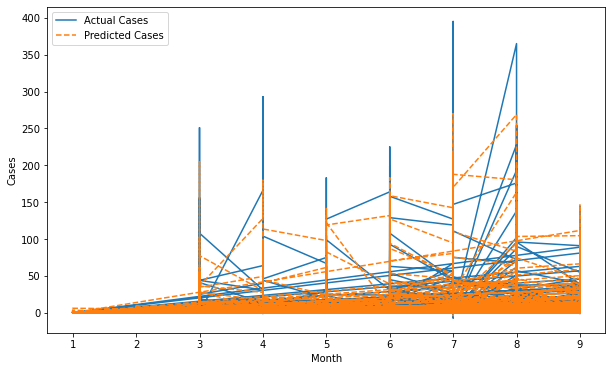

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(Northwest['month'], Northwest['covid_19_confirmed_cases'], label="Actual Cases")
plt.plot(Northwest['month'], model.predict(X), label="Predicted Cases", linestyle='dashed')
plt.xlabel("Month")
plt.ylabel("Cases")
plt.legend()
plt.show()

In [19]:
import itertools as it


In [21]:
params = {'n_estimators': [300],
          'max_depth': [12,15,18],
          'max_leaf_nodes':[1100,1200,1300],
          'max_features': [1,2,3,4]}

param_list=list(it.product(*(params[Name] for Name in params)))

oob_score = [0]*len(param_list)
i=0
for pr in param_list:
    model = RandomForestRegressor(random_state=1,oob_score=True,verbose=False,n_estimators = pr[0],
                                 max_depth=pr[1],
                                  max_leaf_nodes=pr[2],max_features=pr[3],
                                  n_jobs=-1).fit(X,y)
    oob_score[i] = model.oob_score_
    i=i+1
    
print("Best params = ", param_list[np.argmax(oob_score)])
print("Best score (R-squared) = ", np.max(oob_score))

Best params =  (300, 12, 1200, 1)
Best score (R-squared) =  0.6191598372584882


In [22]:
model = RandomForestRegressor(n_estimators=300, max_depth = 12, max_leaf_nodes = 1200, max_features=1).fit(X, y)

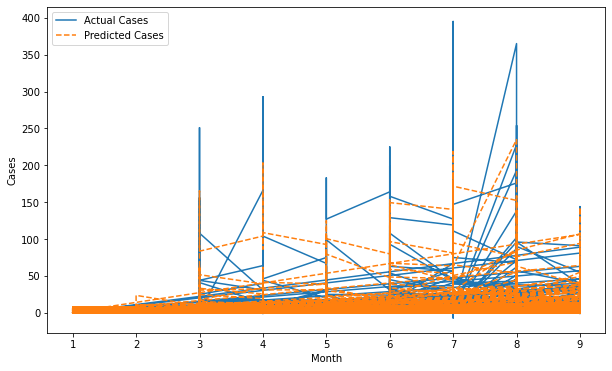

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(Northwest['month'], Northwest['covid_19_confirmed_cases'], label="Actual Cases")
plt.plot(Northwest['month'], model.predict(X), label="Predicted Cases", linestyle='dashed')
plt.xlabel("Month")
plt.ylabel("Cases")
plt.legend()
plt.show()